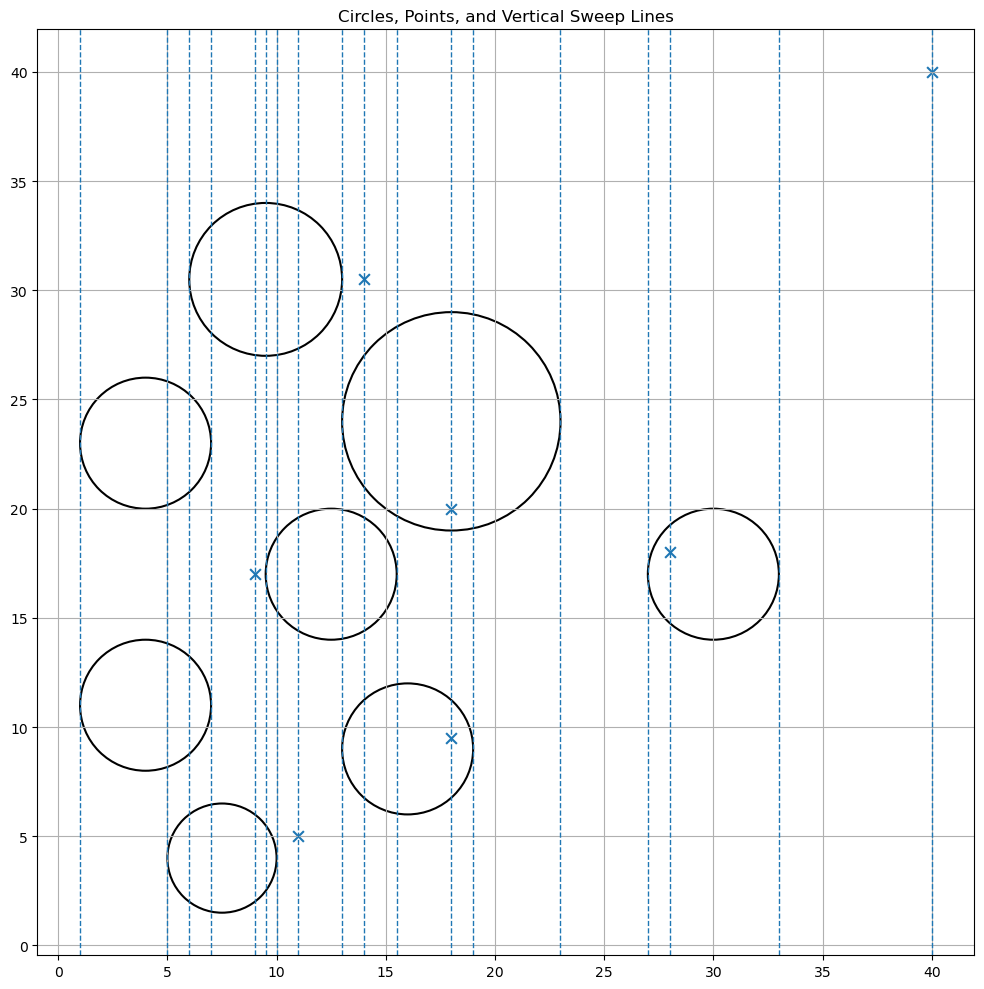

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle as CirclePatch

# --- Data ---
circles = [
    ((9.5, 30.5), 3.5),
    ((18, 24), 5),
    ((4, 23), 3),
    ((12.5, 17), 3),
    ((30, 17), 3),
    ((4, 11), 3),
    ((16, 9), 3),
    ((7.5, 4), 2.5),
]

points = [
    (28, 18),
    (9, 17),
    (18, 9.5),
    (18, 20),
    (11, 5),
    (14, 30.5),
    (40, 40),
]

def plot_circles_points_with_verticals(circles, points, figsize=(7, 6)):
    fig, ax = plt.subplots(figsize=figsize)

    # Collect verticals: points' x and circle endpoints (cx±r)
    vxs = set(x for x, _ in points)
    for (cx, cy), r in circles:
        vxs.add(cx - r)
        vxs.add(cx + r)

    # Circles
    for ((cx, cy), r) in circles:
        ax.add_patch(CirclePatch((cx, cy), r, fill=False, linewidth=1.5))

    # Points
    if points:
        px, py = zip(*points)
        ax.scatter(px, py, marker="x", s=60, linewidths=1.5)

    # Dashed verticals
    for x in sorted(vxs):
        ax.axvline(x, linestyle="--", linewidth=1)

    # Bounds
    xs = list(px) + [cx - r for (cx, cy), r in circles] + [cx + r for (cx, cy), r in circles] if points else \
         [cx - r for (cx, cy), r in circles] + [cx + r for (cx, cy), r in circles]
    ys = list(py) + [cy - r for (cx, cy), r in circles] + [cy + r for (cx, cy), r in circles] if points else \
         [cy - r for (cx, cy), r in circles] + [cy + r for (cx, cy), r in circles]

    if xs and ys:
        xmin, xmax = min(xs), max(xs)
        ymin, ymax = min(ys), max(ys)
        pad = 0.05 * max(xmax - xmin, ymax - ymin) or 1.0
        ax.set_xlim(xmin - pad, xmax + pad)
        ax.set_ylim(ymin - pad, ymax + pad)

    ax.set_aspect("equal", adjustable="box")
    ax.set_title("Circles, Points, and Vertical Sweep Lines")
    ax.grid(True)
    fig.tight_layout()
    plt.show()

# Example call:
plot_circles_points_with_verticals(circles, points, figsize=(12, 10))
